In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [122]:
# Função para converter '0m0;001s' em segundos
def converter_tempo(tempo_str):
    # Substituir ";" por "." e separar minutos e segundos
    tempo_str = tempo_str.replace(';', '.')
    
    # Separar o tempo em minutos e segundos
    minutos, segundos = tempo_str.strip('s').split('m')
    
    # Converter para float e calcular o tempo total em segundos
    total_segundos = int(minutos) * 60 + float(segundos)
    return total_segundos

def processar_dados(nome_csv):
    df = pd.read_csv(nome_csv)
    # Aplicar a função para converter a coluna 'tempo_de_execucao' em segundos
    #df['tempo_de_execucao'] = df['tempo_de_execucao'].apply(converter_tempo)
    #df['tempo_de_execucao'] = df['tempo_de_execucao']*1000
    #df = df.sort_values(by=sorted_by)
    return df
def plotar_grafico(df, xlabel_name, ylabel_name,title_name):
    ### Dados crescentes
    df_crescente = df[df["Diretório"] == "crescente"]
    plt.plot(df_crescente["NumCasos"], df_crescente['TempoReal'], 
             marker='o', linestyle='-', color='blue', label = "Crescente")
    ### Dados decrescentes
    df_decrescente = df[df["Diretório"] == "decrescente"]
    plt.plot(df_decrescente["NumCasos"], df_decrescente['TempoReal'], 
             marker='o', linestyle='-', color='red', label = "Decrescente")
    ### Dados aleatórios
    df_aleatorio = df[df["Diretório"] == "aleatorio"]

    df_aleatorio = pd.DataFrame(df_aleatorio.groupby("NumCasos")["TempoReal"].mean()).reset_index()

    plt.plot(df_aleatorio["NumCasos"], df_aleatorio['TempoReal'], 
             marker='o', linestyle='-', color='black', label = "Aleatório")
    plt.xlabel(xlabel_name)
    plt.ylabel(ylabel_name)
    plt.title(title_name)
    plt.legend()
    #plt.grid(True)
    plt.grid(True, which='both', linestyle='--', linewidth=0.7, color='gray')  # Grid mais visível
    plt.minorticks_on()  # Ativar as linhas menores
    plt.grid(True, which='minor', linestyle=':', linewidth=0.5, color='gray')  # Linhas menores
    plt.show()

## Merge Sort

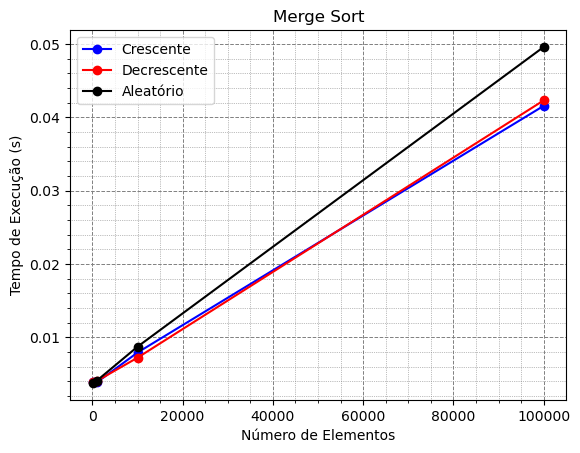

In [123]:
df_merge = processar_dados("tempos_execucao_merge_sort.csv")
plotar_grafico(df_merge,"Número de Elementos", "Tempo de Execução (s)", "Merge Sort")

## Bubble Sort

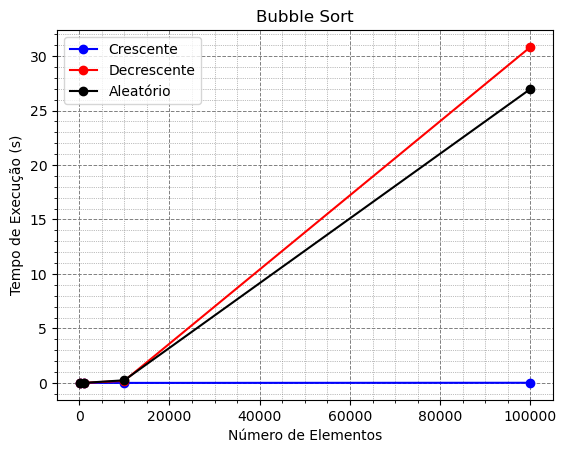

In [124]:
df_bubble = processar_dados("tempos_execucao_bubble_sort.csv")
plotar_grafico(df_bubble,"Número de Elementos", "Tempo de Execução (s)", "Bubble Sort")

## Contagem dos Menores

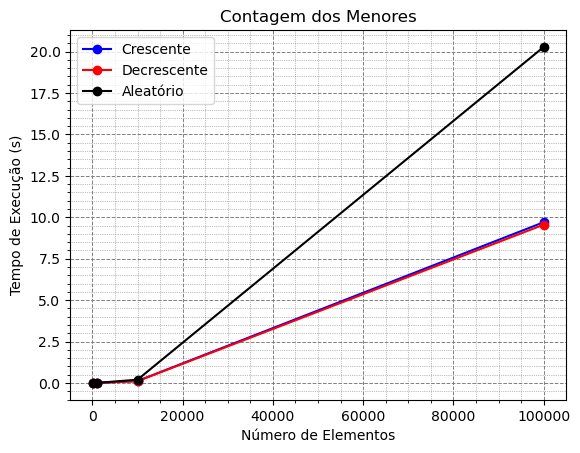

In [125]:
df_menores = processar_dados("tempos_execucao_contagem_dos_menores.csv")
plotar_grafico(df_menores,"Número de Elementos", "Tempo de Execução (s)", "Contagem dos Menores")

## Heap Sort

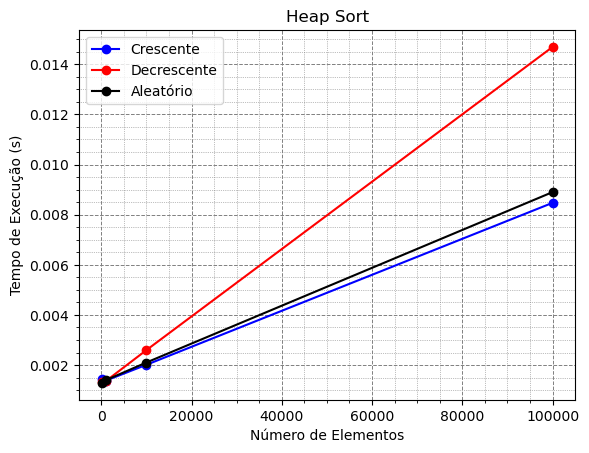

In [126]:
df_heap = processar_dados("tempos_execucao_heap_sort.csv")
plotar_grafico(df_heap,"Número de Elementos", "Tempo de Execução (s)", "Heap Sort")

## Insertion Sort

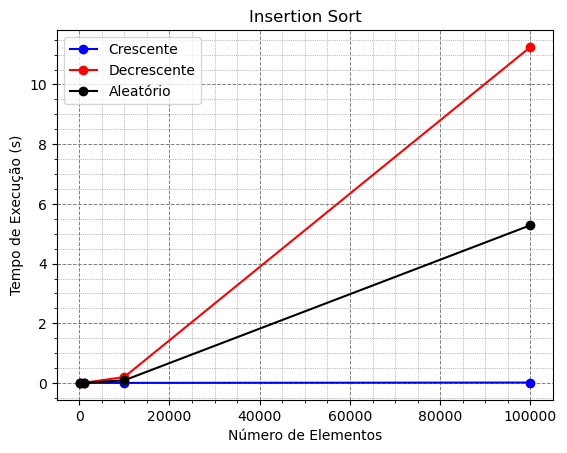

In [127]:
df_insertion = processar_dados("tempos_execucao_insertion_sort.csv")
plotar_grafico(df_insertion,"Número de Elementos", "Tempo de Execução (s)", "Insertion Sort")

## Shell Sort

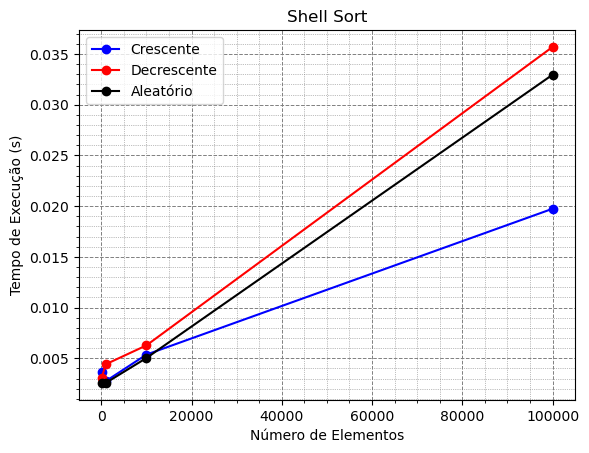

In [128]:
df_shell= processar_dados("tempos_execucao_shell_sort.csv")
plotar_grafico(df_shell,"Número de Elementos", "Tempo de Execução (s)", "Shell Sort")

## Quick Sort

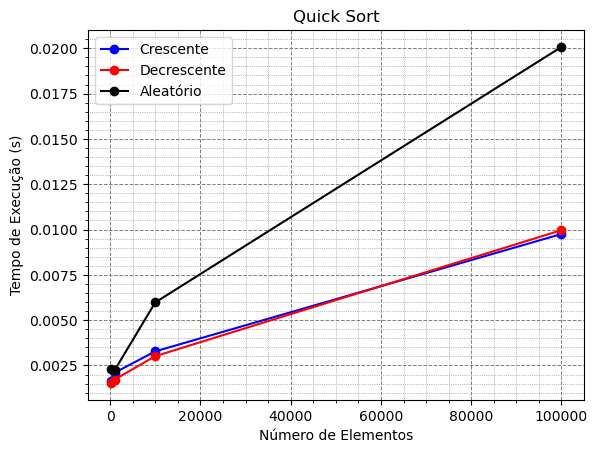

In [129]:
df_quick = processar_dados("tempos_execucao_quick_sort.csv")
plotar_grafico(df_quick,"Número de Elementos", "Tempo de Execução (s)", "Quick Sort")

## Radix Sort

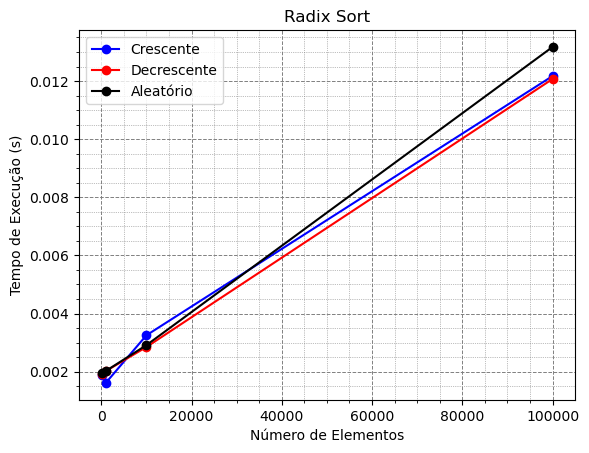

In [130]:
df_radix = processar_dados("tempos_execucao_radix_sort.csv")
plotar_grafico(df_radix,"Número de Elementos", "Tempo de Execução (s)", "Radix Sort")

## Selection Sort

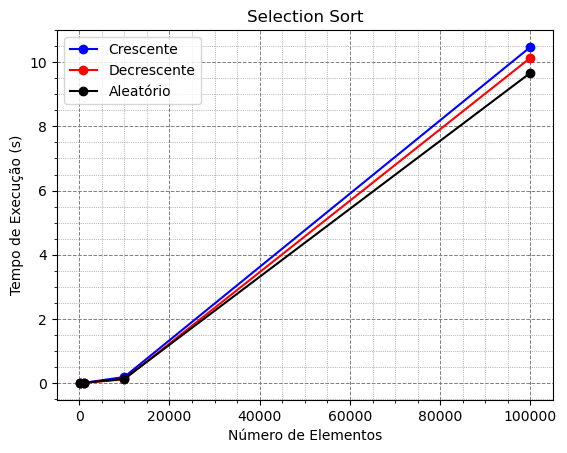

In [131]:
df_selection = processar_dados("tempos_execucao_selection_sort.csv")
plotar_grafico(df_selection,"Número de Elementos", "Tempo de Execução (s)", "Selection Sort")

In [132]:
df_bubble['metodo'] = 'bubble_sort'
df_merge['metodo'] = 'merge_sort'
df_menores['metodo'] = 'contagem_dos_menores'
df_shell['metodo'] ='shell_sort'
df_insertion['metodo'] = 'insertion_sort'
df_selection['metodo'] = 'selection_sort'
df_heap['metodo'] = 'heap_sort'
df_quick['metodo'] = 'quick_sort'
df_radix['metodo'] = 'radix_sort'

In [138]:
df = pd.concat([df_bubble, df_merge, df_menores, df_shell, df_insertion, df_selection, df_heap, df_quick, df_radix], ignore_index=True)


In [139]:
df.head()

,Diretório,Arquivo,TempoReal,NumCasos,ComChaves,MovRegistros,metodo
0,decrescente,100000.in,31,100000,4999950000,4999950000,bubble_sort
1,decrescente,10000.in,0,10000,49995000,49995000,bubble_sort
2,decrescente,1000.in,0,1000,499500,499500,bubble_sort
3,decrescente,100.in,0,100,4950,4950,bubble_sort
4,crescente,100000.in,0,100000,99999,0,bubble_sort


In [140]:
grouped = df.groupby(['metodo', 'Diretório', 'NumCasos'])[['ComChaves', 'MovRegistros']].mean().reset_index()



In [141]:
pivoted = grouped.pivot_table(index=['metodo', 'Diretório'], columns='NumCasos', values=['ComChaves', 'MovRegistros'], aggfunc='mean')


In [142]:
pd.options.display.float_format = '{:.0f}'.format
pivoted

ComChaves                             \
NumCasos                            100    1000     10000      100000   
metodo               Diretório                                          
bubble_sort          aleatorio        4879 498882 49992426 4999906138   
                     crescente          99    999     9999      99999   
                     decrescente      4950 499500 49995000 4999950000   
contagem_dos_menores aleatorio        4950 499500 49995000  704982704   
                     crescente        4950 499500 49995000  704982704   
                     decrescente      4950 499500 49995000  704982704   
heap_sort            aleatorio         486   5084    42187     318140   
                     crescente         452   4909    40071     332973   
                     decrescente       475   7029    63538    1024905   
insertion_sort       aleatorio        2449 251293 25033688 2503872312   
                     crescente          99    999     9999      99999   
                     decrescente      5049 500499 50004999 5000049999   
merge_sort           aleatorio         672   9976   133616    1668928   
                     crescente         672   9976   133616    1668928   
                     decrescente       672   9976   133616    1668928   
quick_sort           aleatorio         825  12576   165408    2093298   
                     crescente         606   9009   125439    1600016   
                     decrescente       610   9016   125452    1600030   
radix_sort           aleatorio          99    999     9999      99999   
                     crescente          99    999     9999      99999   
                     decrescente        99    999     9999      99999   
selection_sort       aleatorio        5049 500499 50004999  705082703   
                     crescente        5049 500499 50004999  705082703   
                     decrescente      5049 500499 50004999  705082703   
shell_sort           aleatorio         904  15404   267687    4346655   
                     crescente         763  12706   182565    2344566   
                     decrescente       503   8006   120005    1500006   

                                 MovRegistros                             
NumCasos                               100    1000     10000      100000  
metodo               Diretório                                            
bubble_sort          aleatorio           2350 250294 25023689 2503772313  
                     crescente              0      0        0          0  
                     decrescente         4950 499500 49995000 4999950000  
contagem_dos_menores aleatorio              0      0        0          0  
                     crescente              0      0        0          0  
                     decrescente            0      0        0          0  
heap_sort            aleatorio            436   4584    37187     268140  
                     crescente            402   4409    35071     282973  
                     decrescente          425   6529    58538     974905  
insertion_sort       aleatorio           2449 251293 25033688 2503872312  
                     crescente             99    999     9999      99999  
                     decrescente         5049 500499 50004999 5000049999  
merge_sort           aleatorio            672   9976   133616    1668928  
                     crescente            672   9976   133616    1668928  
                     decrescente          672   9976   133616    1668928  
quick_sort           aleatorio            220   2937    37370     452101  
                     crescente             63    511     5904      65535  
                     decrescente          112   1010    10904     115534  
radix_sort           aleatorio            780  10800   144000    1680000  
                     crescente            900  12000   150000    1800000  
                     decrescente          600   9000   120000    1500000  
selection_sort       aleatorio            